# Learning Outcomes
1. kNN classifier: how it works? Create data and labels and apply knn to make prediction on unseen data
2. HOG (Histogram Of Gradient) is a way of extracting features from images.
3. Demo on different problems: multiclass and binary problem

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

## How kNN works?

The prediction: [[0.]]
The labels of neighbors: [[0. 1. 0.]]
the square distance: [[324. 328. 857.]]


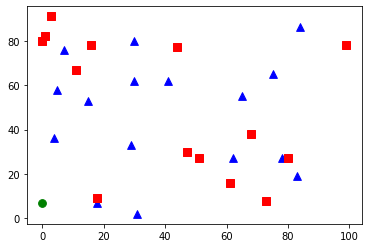

In [14]:
np.random.seed(5)
# generate (randomly bivarient sample from uniform distribution [0-99])
train_data = np.random.randint(0, 100, (30,2)).astype(np.float32)
targets = np.random.randint(0, 2, (30, 1)).astype(np.float32)

# subset data based on the target
dataA = train_data[targets.flatten()==0]
plt.scatter(dataA[:, 0], dataA[:, 1], marker = '^', c = 'b', s=60)

dataB = train_data[targets.flatten()==1]
plt.scatter(dataB[:, 0], dataB[:, 1], marker = 's', c = 'r', s=60)

# sample a new unseen data
new_data=np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(new_data[:, 0], new_data[:, 1],  marker = 'o', c = 'g', s=60)

#create a kNN object(OpenCv function)
knn = cv.ml.KNearest_create()
knn.train(train_data, cv.ml.ROW_SAMPLE, targets)
ret, pred, label_neighbors, sq_dist = knn.findNearest(new_data, 3)

print(f"The prediction: {pred}")
print(f"The labels of neighbors: {label_neighbors}")
print(f"the square distance: {sq_dist}")

plt.show()

In [117]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(train_data, targets.flatten())
print("The prediction: ", knn.predict(new_data))

The prediction:  [0.]


In [118]:
knn.kneighbors(new_data)

(array([[18.        , 18.11077028, 29.27456234]]),
 array([[23, 12, 18]], dtype=int64))

In [119]:
dist,idx_neigh = knn.kneighbors(new_data)

targets[idx_neigh]

array([[[0.],
        [1.],
        [0.]]], dtype=float32)

## Fashion mnist data classification with kNN

In [120]:
sys.path

['C:\\Users\\fict\\Downloads\\week 10',
 'C:/Users/fict/Downloads/week 10/fashion-mnist-master/utils',
 'C:/Users/fict/Downloads/week 10/fashion-mnist-master/utils',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310',
 '',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin']

In [121]:
sys.path.insert(1,"C:/Users/fict/Downloads/week 10/fashion-mnist-master/utils")

In [122]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('./fashion-mnist-master/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('./fashion-mnist-master/data/fashion', kind='t10k')

In [123]:
X_train.shape

(60000, 784)

The first value in the shape output is the no. sample: 60000. 784 is the individual pixel value. 28*28

In [124]:
X_test.shape

(10000, 784)

In [125]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [126]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker",
               "Bag", "Ankle boot"]

In [127]:
X_train.dtype

dtype('uint8')

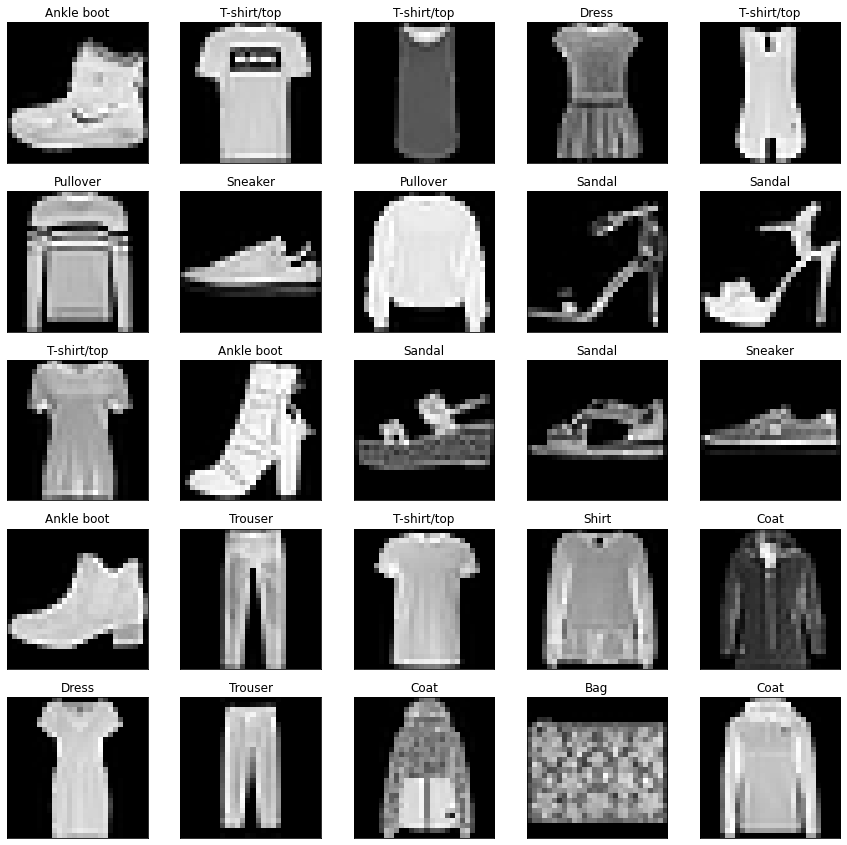

In [128]:
# visualization
plt.figure(figsize=(15, 15))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i].reshape((28, 28)), cmap=plt.cm.gray)
    plt.xticks([]), plt.yticks([])
    plt.title(class_labels[y_train[i]])
    
plt.show()


In [129]:
# preprocessing is not necessary because the range has been standardize to [0-255]
np.random.seed(6)
rand_num = np.random.permutation(len(X_train))
sample_size = int(0.1 * len(X_train))
idx = rand_num[:sample_size]

X_train_part = X_train[idx]
y_train_part = y_train[idx]

In [130]:
X_train_part.shape

(6000, 784)

In [131]:
from sklearn.model_selection import cross_val_score # k-fold-cv accuracy

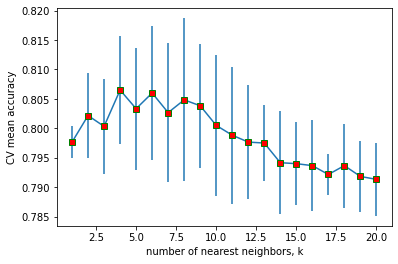

In [132]:
k_list = np.arange(1, 21)

mean_acc = []
std_acc = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    scores = cross_val_score(knn, X_train_part, y_train_part, cv=5)
    mean_acc.append(scores.mean())
    std_acc.append(scores.std())
    

plt.errorbar(k_list, mean_acc, std_acc, marker="s", mfc="red", mec="green")
plt.xlabel("number of nearest neighbors, k")
plt.ylabel("CV mean accuracy")
plt.show()


In [133]:
import time

In [134]:
k_best = k_list[np.argmax(mean_acc)]

start = time.time()
#retrain the knn with all the train data
knn = KNeighborsClassifier(n_neighbors=k_best, n_jobs=-1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(f"The execution time of training and prediction: {(time.time()-start):.3f}s.")

The execution time of training and prediction: 12.009s.


In [135]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [136]:
print(classification_report(y_test, knn.predict(X_test),target_names=class_labels))

              precision    recall  f1-score   support

 T-shirt/top       0.75      0.89      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.71      0.83      0.76      1000
       Dress       0.90      0.87      0.89      1000
        Coat       0.80      0.74      0.77      1000
      Sandal       0.99      0.85      0.92      1000
       Shirt       0.68      0.55      0.60      1000
     Sneaker       0.88      0.97      0.93      1000
         Bag       0.98      0.95      0.97      1000
  Ankle boot       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



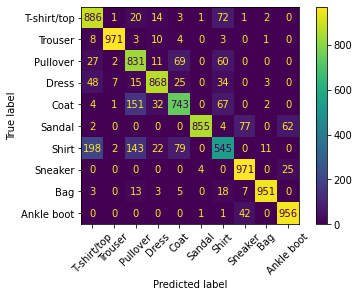

In [137]:
conf_mat =confusion_matrix(y_test, pred)
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                                           display_labels=class_labels)

cm_display.plot()
plt.xticks(rotation=45)
plt.show()

In [138]:
conf_mat[:,-4].sum()

804

In [139]:
545/804

0.677860696517413

## cats VS dogs classification

In [140]:
# create classes that can preprocess and load the data
class dataProcessor:
    def __init__(self, width, height, inter=cv.INTER_AREA):
        self.width = width
        self.height = height
        self.inter = inter
        
    def preprocess(self, img):
        return cv.resize(img, (self.width, self.height), 
                        interpolation=self.inter)

In [141]:
class dataLoader:
    def __init__(self, preprocessors=None):
        self.preprocessors = preprocessors
        
        if self.preprocessors is None:
            self.preprocessors = []
            
    def load(self, imgPath):
        # initiate the list of features and their corresponding labels
        # imgPath is where all the images are located.
        data = []
        labels = []
        
        for entry in os.listdir(imgPath):
            if os.path.isfile(os.path.join(imgPath, entry)):
                filename = os.path.join(imgPath, entry)
                img = cv.imread(cv.samples.findFile(filename))
                label = entry.split(".")[0]
                
                if self.preprocessors is not None:
                    for p in self.preprocessors:
                        img = p.preprocess(img)
                        
                data.append(img)
                labels.append(label)
                
        return (np.array(data), np.array(labels))

In [142]:
dataPrep = dataProcessor(64,64)
dataLoad = dataLoader(preprocessors=[dataPrep])
X, y = dataLoad.load("./cats_vs_dogs_small/")

In [143]:
X.shape

(3000, 64, 64, 3)

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=500,
                                                   random_state=50)

In [146]:
X_train.shape

(2500, 64, 64, 3)

In [147]:
winSize = (64, 64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
# feature size of 144
nbins = 9
derivAperture = 1
winSigma = -1
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signedGradients = False

hog = cv.HOGDescriptor(winSize, blockSize, blockStride,
                      cellSize, nbins, derivAperture, winSigma, 
                      histogramNormType, L2HysThreshold,
                      gammaCorrection, nlevels, signedGradients)


In [148]:
from sklearn.preprocessing import MinMaxScaler

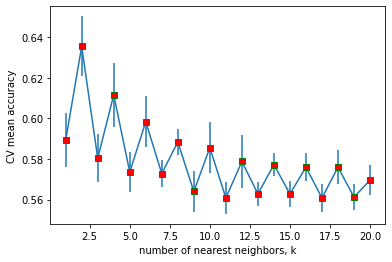

In [149]:
X_train_hog = [hog.compute(x) for x in X_train]
X_train_hog = np.array(X_train_hog)
scaler = MinMaxScaler()
X_train_hog = scaler.fit_transform(X_train_hog)

k_list = np.arange(1, 21)

mean_acc = []
std_acc = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    scores = cross_val_score(knn, X_train_hog, y_train)
    mean_acc.append(scores.mean())
    std_acc.append(scores.std())
    

plt.errorbar(k_list, mean_acc, std_acc, marker="s", mfc="red", mec="green")
plt.xlabel("number of nearest neighbors, k")
plt.ylabel("CV mean accuracy")
plt.show()


In [150]:
#transform X_test and scale it
X_test_hog = [hog.compute(x) for x in X_test]
X_test_hog = np.array(X_test_hog)

X_test_hog = scaler.transform(X_test_hog)

k_best = k_list[np.argmax(mean_acc)]

start = time.time()
#retrain the knn with all the train data
knn = KNeighborsClassifier(n_neighbors=k_best, n_jobs=-1)
knn.fit(X_train_hog, y_train)
pred = knn.predict(X_test_hog)
print(f"The execution time of training and prediction: {(time.time()-start):.3f}s.")

The execution time of training and prediction: 0.035s.


In [151]:
print(classification_report(y_test,pred,target_names=knn.classes_))

              precision    recall  f1-score   support

         cat       0.66      0.37      0.47       250
         dog       0.56      0.81      0.66       250

    accuracy                           0.59       500
   macro avg       0.61      0.59      0.57       500
weighted avg       0.61      0.59      0.57       500



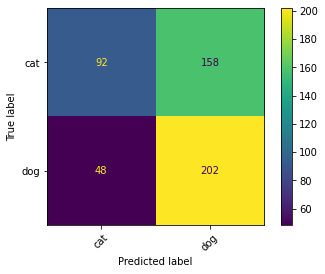

In [154]:
conf_mat =confusion_matrix(y_test, pred)
cm_display =ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                                           display_labels=knn.classes_)

cm_display.plot()
plt.xticks(rotation=45)
plt.show()